#Face Mask Detection with CNN Models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We will start by loading the packages:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

Then, we load and split the dataset into train set and validation set:

In [ ]:
# if you use colab
data_dir = '/content/drive/MyDrive/data'
image_size = (224, 224)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                              validation_split = 0.2,
                                                              subset = "training",
                                                              seed = 42,
                                                              image_size = image_size,
                                                               shuffle = True,
                                                              batch_size = 40)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                             validation_split = 0.2,
                                                             subset = "validation",
                                                             seed = 42,
                                                             image_size = image_size,
                                                              shuffle = True,
                                                             batch_size = 40)

Found 7554 files belonging to 2 classes.
Using 6044 files for training.
Found 7554 files belonging to 2 classes.
Using 1510 files for validation.


Following that, Conv2D, MaxPooling2D, and Dense layers have been used, and the initial model has been constructed. Filter size of 3 has been considered, and relu activation function has been used for intermediate layers. Considering that the problem is binary classification, sigmoid activation function has been used for the final layer.

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32, #number of filter
                 kernel_size=(3,3), #height/width of filter
                 activation='relu',
                 input_shape=(224,224,3)

))
model.add(Conv2D(filters=32, #number of filter
                 kernel_size=(3,3), #height/width of filter
                 activation='relu',

))
model.add(MaxPooling2D(pool_size=(2,2))) #Dimensions of the region that are pooli
model.add(Conv2D(filters=32, #number of filter
                 kernel_size=(3,3), #height/width of filter
                 activation='relu',

))
model.add(Conv2D(filters=32, #number of filter
                 kernel_size=(3,3), #height/width of filter
                 activation='relu',

))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))





We train the constructed network using the binary_crossentropy loss function and Adam optimizer for 30 epochs. The resulting loss curve is plotted below.

In [ ]:
#compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
history=model.fit(train_ds,batch_size=800,epochs=30,verbose=2,validation_data=test_ds)

Epoch 1/30
152/152 - 1349s - loss: 3.1703 - accuracy: 0.8200 - precision: 0.8265 - recall: 0.8157 - val_loss: 0.2801 - val_accuracy: 0.8881 - val_precision: 0.9463 - val_recall: 0.8268
Epoch 2/30
152/152 - 26s - loss: 0.2075 - accuracy: 0.9241 - precision: 0.9280 - recall: 0.9216 - val_loss: 0.3453 - val_accuracy: 0.8762 - val_precision: 0.9648 - val_recall: 0.7852
Epoch 3/30
152/152 - 26s - loss: 0.1589 - accuracy: 0.9411 - precision: 0.9416 - recall: 0.9422 - val_loss: 0.2404 - val_accuracy: 0.9159 - val_precision: 0.9052 - val_recall: 0.9323
Epoch 4/30
152/152 - 27s - loss: 0.0897 - accuracy: 0.9671 - precision: 0.9676 - recall: 0.9673 - val_loss: 0.2973 - val_accuracy: 0.9119 - val_precision: 0.9239 - val_recall: 0.9010
Epoch 5/30
152/152 - 26s - loss: 0.0777 - accuracy: 0.9742 - precision: 0.9730 - recall: 0.9762 - val_loss: 0.3221 - val_accuracy: 0.9166 - val_precision: 0.9246 - val_recall: 0.9102
Epoch 6/30
152/152 - 27s - loss: 0.0617 - accuracy: 0.9788 - precision: 0.9794 - re

You can see that the model achieves 99% accuracy on the training data and 92% accuracy on the validation data.

In [ ]:
model.save("/content/drive/MyDrive/HW3/TrainedModel.h5")

In this section, the error and accuracy during training are plotted for both training and validation datasets.

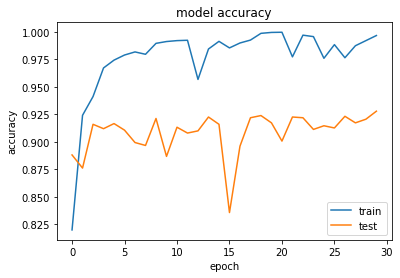

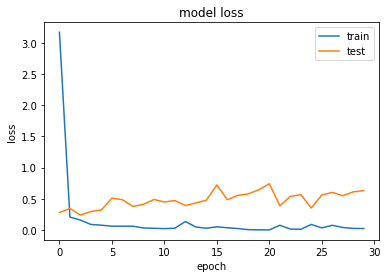

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

As observed, the error on the training data has decreased during the training process, indicating that the model is not underfitting and performs well on the training data. Therefore, there is no need to add new layers or change the learning rate.

However, since the changes in error between the training and validation datasets are not similar, and the error on the validation data has increased, it suggests that the model has overfitted. To address this issue, dropout layers have been used, and the model is being retrained.

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32, #number of filter
                 kernel_size=(3,3), #height/width of filter
                 activation='relu',
                 input_shape=(224,224,3)

))
model.add(Conv2D(filters=32, #number of filter
                 kernel_size=(3,3), #height/width of filter
                 activation='relu',

))
model.add(MaxPooling2D(pool_size=(2,2))) #Dimensions of the region that are pooli
model.add(Conv2D(filters=32, #number of filter
                 kernel_size=(3,3), #height/width of filter
                 activation='relu',

))
model.add(Conv2D(filters=32, #number of filter
                 kernel_size=(3,3), #height/width of filter
                 activation='relu',

))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
#out put layer
model.add(Dense(1,activation='sigmoid'))



In [ ]:
#compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
history=model.fit(train_ds,batch_size=800,epochs=30,verbose=2,validation_data=test_ds)

Epoch 1/30
152/152 - 27s - loss: 4.9010 - accuracy: 0.5870 - precision_1: 0.6074 - recall_1: 0.5221 - val_loss: 0.5938 - val_accuracy: 0.7126 - val_precision_1: 0.6644 - val_recall_1: 0.8789
Epoch 2/30
152/152 - 26s - loss: 0.4890 - accuracy: 0.7722 - precision_1: 0.7561 - recall_1: 0.8122 - val_loss: 0.7079 - val_accuracy: 0.7722 - val_precision_1: 0.7015 - val_recall_1: 0.9609
Epoch 3/30
152/152 - 26s - loss: 0.4929 - accuracy: 0.7601 - precision_1: 0.7311 - recall_1: 0.8324 - val_loss: 0.3219 - val_accuracy: 0.8940 - val_precision_1: 0.9021 - val_recall_1: 0.8880
Epoch 4/30
152/152 - 26s - loss: 0.2384 - accuracy: 0.9070 - precision_1: 0.9061 - recall_1: 0.9108 - val_loss: 0.2837 - val_accuracy: 0.8934 - val_precision_1: 0.8988 - val_recall_1: 0.8906
Epoch 5/30
152/152 - 26s - loss: 0.1407 - accuracy: 0.9489 - precision_1: 0.9544 - recall_1: 0.9441 - val_loss: 0.2967 - val_accuracy: 0.9040 - val_precision_1: 0.8908 - val_recall_1: 0.9245
Epoch 6/30
152/152 - 26s - loss: 0.0923 - acc

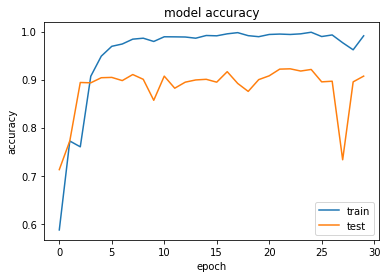

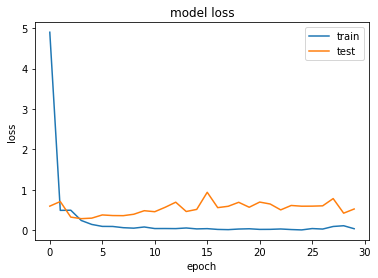

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

The performance of the model on both training and validation datasets has become more similar compared to the previous model.

In [ ]:
model.save("/content/drive/MyDrive/HW3/TrainedModel1.h5")

Here, a function has been defined to evaluate the performance of the network for different optimizers. The error plot for each of these optimizers is drawn below."

In [ ]:
def Learning_rate(m):

  model.compile(optimizer=m,
              loss='binary_crossentropy')

  history=model.fit(train_ds,epochs=15,verbose=0)

  return history.history['loss']

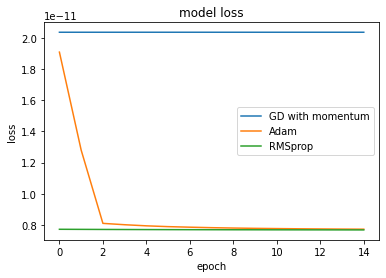

In [ ]:
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop
#alpha=0.001
#opt=SGD(0.001,momentum=0.9,nesterov=True)
#plt.plot(Learning_rate(opt),label ='nestrov momentum')
L=Learning_rate(opt)
opt=SGD(0.001,momentum=0.9)
plt.plot(Learning_rate(opt),label ='GD with momentum')
opt=Adam(0.001)
plt.plot(Learning_rate(opt),label ='Adam')
opt=RMSprop(0.001)
plt.plot(Learning_rate(opt),label ='RMSprop')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

Based on the above plot, the performance of the network using Adam and RMSprop optimizers is better compared to GD with momentum, as the network exhibits lower error during training.


#2) Testing the Convolutional Neural Network (CNN)

Following, the face_recognition library is installed and used for detecting face locations in images.

In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=a02d0f770ceb96020b41b85429386e4374da73e12810c97cf9e1400d14bb28f5
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition

Here, the coordinates of facial landmarks are extracted using the face_recognition library, and based on these coordinates, the facial region is separated from the input image.

In [ ]:
image = face_recognition.load_image_file("T1.jpg")
np.shape(image)
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)

(223, 223, 3)

The size of the images is resized to 224 based on the input requirement of the convolutional network. Subsequently, you can view this image.

In [ ]:
import cv2
dim=(224,224)
resized=cv2.resize(face_image,dim)
np.shape(resized)

(224, 224, 3)

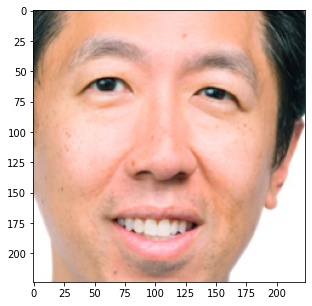

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(resized)

In this section, the model designed in the previous question is loaded to classify test images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")

Mounted at /content/drive


The image is preprocessed before being fed into the network.

In [ ]:
arr4d = np.expand_dims(resized, 0)  # shape (1, y_pixels, x_pixels, n_bands)
np.shape(arr4d)

(1, 224, 224, 3)

And finally, the model has been evaluated on this data, correctly classifying this sample with low error.

In [ ]:
loaded_model.predict_classes(arr4d)
#np.argmax(loaded_model.predict(arr4d), axis=-1)
#loaded_model.predict(arr4d)
#loaded_model.evaluate(arr4d,Y)


1/1 [==============================] - 4s 4s/step - loss: 5.6432e-14 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000


[5.64316151587755e-14, 1.0, 1.0, 1.0]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

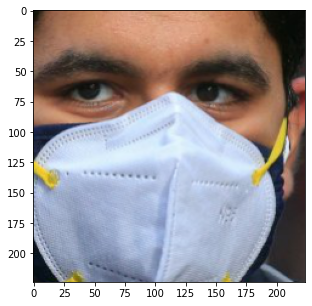

In [ ]:
image = face_recognition.load_image_file("S1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)  # shape (1, y_pixels, x_pixels, n_bands)
loaded_model.predict_classes(arr4d)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

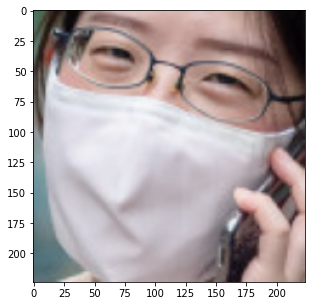

In [ ]:
image = face_recognition.load_image_file("Z1.JPG")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    # Print the location of each face in this image
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)  # shape (1, y_pixels, x_pixels, n_bands)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

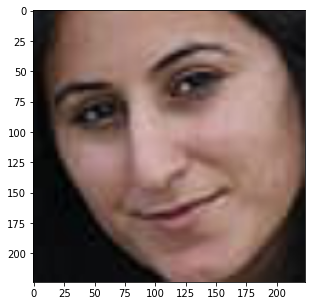

In [ ]:
image = face_recognition.load_image_file("G1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    # Print the location of each face in this image
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)  # shape (1, y_pixels, x_pixels, n_bands)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

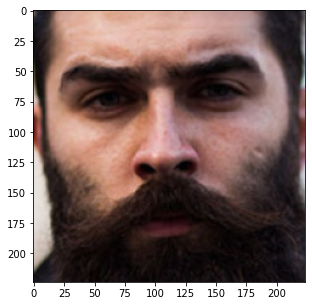

In [ ]:
image = face_recognition.load_image_file("H1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

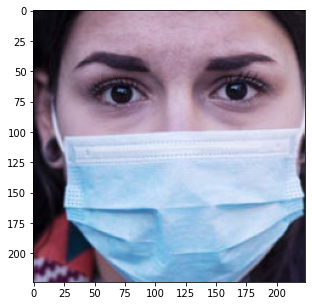

In [ ]:
image = face_recognition.load_image_file("D1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
import cv2
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

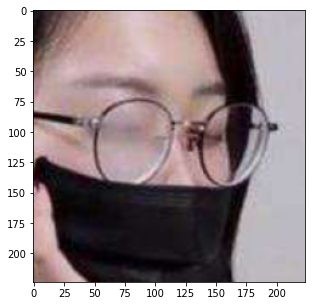

In [ ]:
image = face_recognition.load_image_file("F1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

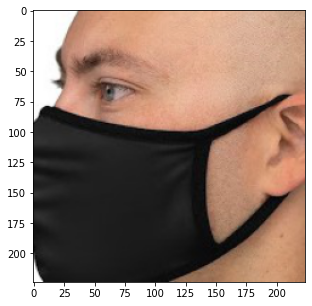

In [ ]:
image = face_recognition.load_image_file("B1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

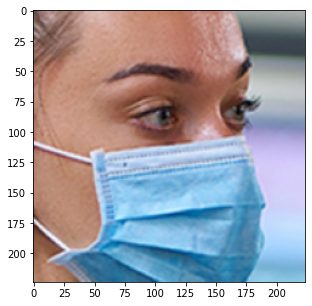

In [ ]:
image = face_recognition.load_image_file("Q1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

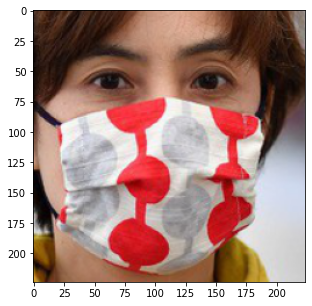

In [ ]:
image = face_recognition.load_image_file("8.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

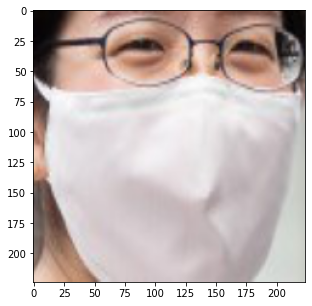

In [ ]:
image = face_recognition.load_image_file("W1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

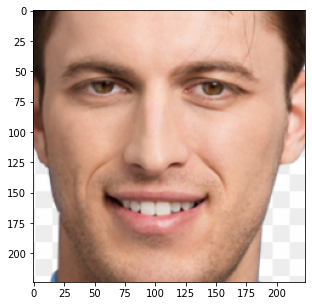

In [ ]:
image = face_recognition.load_image_file("P1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

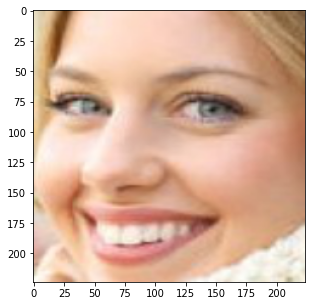

In [ ]:
image = face_recognition.load_image_file("A1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

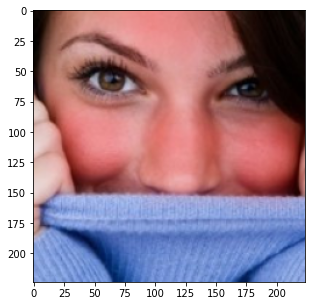

In [ ]:
image = face_recognition.load_image_file("V1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

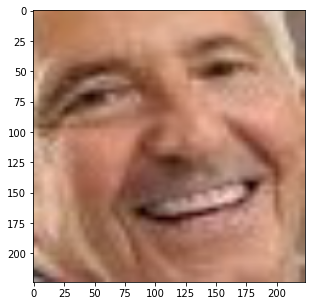

In [ ]:
image = face_recognition.load_image_file("Z1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

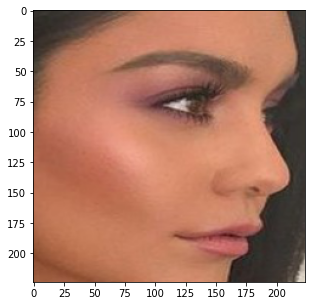

In [ ]:
image = face_recognition.load_image_file("H1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

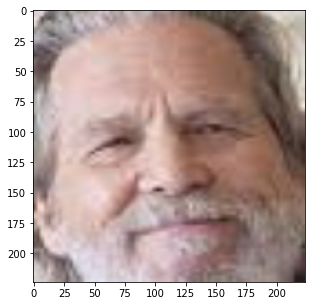

In [ ]:
image = face_recognition.load_image_file("S1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

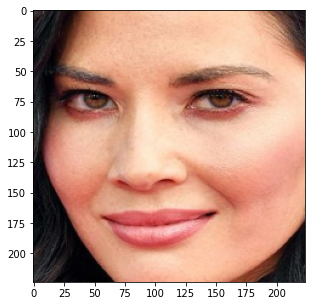

In [ ]:
image = face_recognition.load_image_file("M1.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
np.shape(face_image)
dim=(224,224)
resized=cv2.resize(face_image,dim)
plt.figure(figsize=(5,5))
plt.imshow(resized)
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
arr4d = np.expand_dims(resized, 0)
loaded_model.predict_classes(arr4d)

All these 20 images have been given to the model for evaluation, and the model's error rate and accuracy on these data have been displayed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/HW3/TrainedModel1.h5")
data_dir = '/content/drive/MyDrive/testpic'
image_size = (224, 224)



test= tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                             #seed = 42,
                                                             image_size = image_size,
                                                             shuffle = True)
                                                             #batch_size = 40)
loaded_model.evaluate(test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 20 files belonging to 2 classes.
1/1 [==============================] - 20s 20s/step - loss: 0.3637 - accuracy: 0.8500 - precision_1: 0.8889 - recall_1: 0.8000


[0.36365634202957153,
 0.8500000238418579,
 0.8888888955116272,
 0.800000011920929]

#3)Transfer Learning

In [ ]:
from tensorflow import keras

In this section, we use a VGG model pre-trained on the Imagenet dataset. By setting include_top=False, we consider this model without its fully connected layers. Then, we freeze all the weights of this model so that they do not change during the training process. Essentially, we use this model for feature extraction purposes.

In [ ]:
base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)
base_model.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Next, we add two fully connected layers to the network. During the training process, only the weights of these added layers are learned, while the weights of the pre-trained VGG model remain frozen.

In [ ]:
Inputs = keras.Input(shape=(224, 224, 3))
x = base_model(Inputs, training=False)
x=keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(Inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 17,926,209
Trainable params: 3,211,521
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
history=model.fit(train_ds,batch_size=800,epochs=30,verbose=2,validation_data=test_ds)

Epoch 1/30
152/152 - 1230s - loss: 19.3326 - accuracy: 0.6818 - precision: 0.7552 - recall: 0.5501 - val_loss: 0.5250 - val_accuracy: 0.7252 - val_precision: 0.9095 - val_recall: 0.5104
Epoch 2/30
152/152 - 46s - loss: 0.4538 - accuracy: 0.7924 - precision: 0.8695 - recall: 0.6942 - val_loss: 0.4497 - val_accuracy: 0.8099 - val_precision: 0.8002 - val_recall: 0.8346
Epoch 3/30
152/152 - 45s - loss: 0.3841 - accuracy: 0.8379 - precision: 0.8844 - recall: 0.7821 - val_loss: 0.4172 - val_accuracy: 0.8245 - val_precision: 0.8759 - val_recall: 0.7630
Epoch 4/30
152/152 - 46s - loss: 0.3076 - accuracy: 0.8635 - precision: 0.9048 - recall: 0.8164 - val_loss: 0.3317 - val_accuracy: 0.8523 - val_precision: 0.8638 - val_recall: 0.8424
Epoch 5/30
152/152 - 46s - loss: 0.2634 - accuracy: 0.8804 - precision: 0.9242 - recall: 0.8321 - val_loss: 0.5088 - val_accuracy: 0.8172 - val_precision: 0.7634 - val_recall: 0.9284
Epoch 6/30
152/152 - 46s - loss: 0.2221 - accuracy: 0.8964 - precision: 0.9397 - r

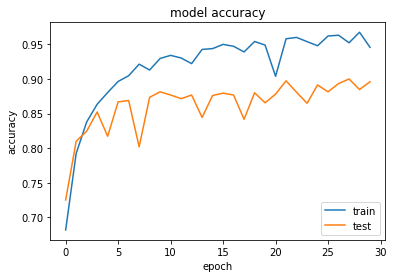

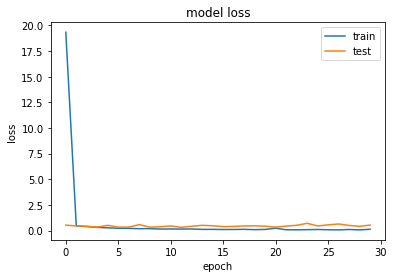

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

As observed, the error curve decreases more rapidly compared to when transfer learning was not used.

The error and accuracy curves indicate the occurrence of overfitting for this model. Therefore, we will proceed by reintroducing dropout layers to the network during further training.

In [ ]:
model.save("/content/drive/MyDrive/HW3/ImagenetModel1.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)
base_model.trainable = False
Inputs = keras.Input(shape=(224, 224, 3))
x = base_model(Inputs, training=False)
x=keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
#x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(Inputs, outputs)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
history=model.fit(train_ds,epochs=40,verbose=2,validation_data=test_ds)

Epoch 1/40
152/152 - 50s - loss: 16.1222 - accuracy: 0.7062 - precision_4: 0.6939 - recall_4: 0.7511 - val_loss: 0.5219 - val_accuracy: 0.8298 - val_precision_4: 0.8097 - val_recall_4: 0.8698
Epoch 2/40
152/152 - 46s - loss: 0.5396 - accuracy: 0.7867 - precision_4: 0.7620 - recall_4: 0.8419 - val_loss: 0.4880 - val_accuracy: 0.8417 - val_precision_4: 0.8123 - val_recall_4: 0.8958
Epoch 3/40
152/152 - 46s - loss: 0.5168 - accuracy: 0.7763 - precision_4: 0.7273 - recall_4: 0.8932 - val_loss: 0.4423 - val_accuracy: 0.8344 - val_precision_4: 0.8689 - val_recall_4: 0.7943
Epoch 4/40
152/152 - 46s - loss: 0.4632 - accuracy: 0.8086 - precision_4: 0.7744 - recall_4: 0.8778 - val_loss: 0.4874 - val_accuracy: 0.7669 - val_precision_4: 0.6966 - val_recall_4: 0.9596
Epoch 5/40
152/152 - 47s - loss: 0.4759 - accuracy: 0.7953 - precision_4: 0.7418 - recall_4: 0.9141 - val_loss: 0.4615 - val_accuracy: 0.8172 - val_precision_4: 0.7985 - val_recall_4: 0.8568
Epoch 6/40
152/152 - 46s - loss: 0.4404 - ac

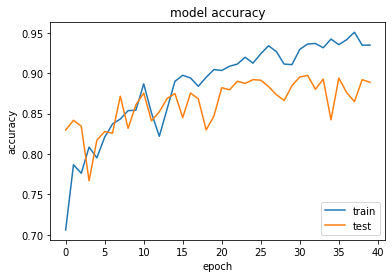

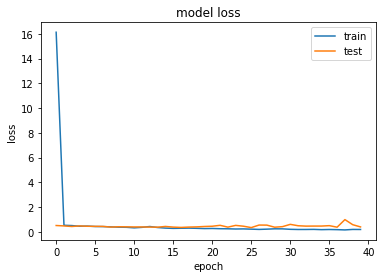

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In the following, 20 test data points are fed into this network, and its performance is evaluated.

In [ ]:
model.save("/content/drive/MyDrive/HW3/ImagenetModel2.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/HW3/ImagenetModel2.h5")
data_dir = '/content/drive/MyDrive/testpic'
image_size = (224, 224)



test= tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                             #seed = 42,
                                                             image_size = image_size,
                                                             shuffle = True)
                                                             #batch_size = 40)
loaded_model.evaluate(test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 20 files belonging to 2 classes.
1/1 [==============================] - 12s 12s/step - loss: 0.5414 - accuracy: 0.9000 - precision_4: 1.0000 - recall_4: 0.8000


[0.5414372086524963, 0.8999999761581421, 1.0, 0.800000011920929]

As observed, the resulting model shows improved performance, with higher accuracy and lower error on the test data.